In [2]:
from LNN import *

from scipy.stats import lognorm

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('ggplot')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Functions

In [3]:
def struct_weight_plot_linear_N(Ns, ks, plot, v=None, nonlinearity='squared', s=1.,
                           sigmaM=1., sigmaS=1., sigmaC=1., ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(ks)))
    # iterate over scales
    for k_idx, k in enumerate(ks):
        for N_idx, N in enumerate(Ns):
            lnn = LNN(N = N, sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
            if plot == 'FI_linear':
                data[N_idx, k_idx] = lnn.FI_linear_struct(N, k, sigmaM, sigmaC)
            elif plot == 'MI_linear':
                data[N_idx, k_idx] = lnn.MI_linear_struct(N, k, sigmaM, sigmaC, sigmaS)
        ax.plot(Ns, data[:, k_idx], label = r'$k_{\mathbf{w}}=%s$' %k, linewidth=4, color=CB_color_cycle[-k_idx])
    ax.set_facecolor('white')
    ax.set_xlabel(r'$N$', fontsize = 30)
    ax.tick_params(labelsize=20)
    ax.set_xlim([np.min(Ns), np.max(Ns)])
    #ax.set_aspect('equal', adjustable='box')
    lgd = ax.legend(loc=2, facecolor='white', prop={'size' : 15})
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

In [4]:
def struct_weight_plot_linear_k(Ns, ks, plot, v=None, nonlinearity='squared', s=1.,
                       sigmaM=1., sigmaS=1., sigmaC=1., ax=None, loc=4):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(ks)))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for k_idx, k in enumerate(ks):
            w = LNN.struct_weight_maker(N, k)
            lnn = LNN(N = N, sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
            if plot == 'FI_linear':
                data[N_idx, k_idx] = lnn.FI_linear_struct(N, k, sigmaM, sigmaC)
            elif plot == 'MI_linear':
                data[N_idx, k_idx] = lnn.MI_linear_struct(N, k, sigmaM, sigmaC, sigmaS)
        ax.plot(ks, data[N_idx, :], label = r'$N=%s$' %N, linewidth=4, color=CB_color_cycle[N_idx])
    ax.set_facecolor('white')
    ax.set_xlabel(r'$k_{\mathbf{w}}$', fontsize = 30)
    ax.set_xlim([np.min(ks), np.max(ks)])
    ax.set_xticks(ks)
    ax.tick_params(labelsize=20)
    #ax.set_aspect('equal', adjustable='box')
    lgd = ax.legend(loc=loc, facecolor = 'white', prop = {'size' : 15})
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

In [8]:
def unstruct_weight_plot_mu(Ns, mus, sigma, repetitions, plot, design='lognormal',
                         v=None, sigmaM=1., sigmaS=1., sigmaC=1., nonlinearity='squared', s=1., ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(mus), repetitions))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for mu_idx, mu in enumerate(mus):
            # iterate over repetitions
            for rep in range(repetitions):
                v = np.ones(N)
                w = 1. + LNN.unstruct_weight_maker(N, design, loc=mu, scale=sigma)
                lnn = LNN(v=v, w=w, nonlinearity=nonlinearity,
                     sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
                if plot == 'FI_linear':
                    data[N_idx, mu_idx, rep] = lnn.FI_linear_stage()
                elif plot == 'MI_linear':
                    data[N_idx, mu_idx, rep] = lnn.MI_linear_stage()
                data_means = np.mean(data[N_idx, :, :], axis=1)
                data_stdevs = np.std(data[N_idx, :, :], axis=1)
        ax.plot(mus, data_means, color=CB_color_cycle[N_idx], linestyle='-', linewidth=4, zorder=10, label=r'$N = %s$' %N)
        ax.fill_between(mus, data_means - data_stdevs, data_means + data_stdevs, color=CB_color_cycle[N_idx], alpha=0.50)
    ax.set_facecolor('white')
    ax.set_xlabel(r'$\mu$', fontsize=30)
    ax.tick_params(labelsize=20)
    lgd = ax.legend(loc = 4, facecolor='white', prop={'size' : 10}, ncol=4)
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

# Figure 2, Part 1

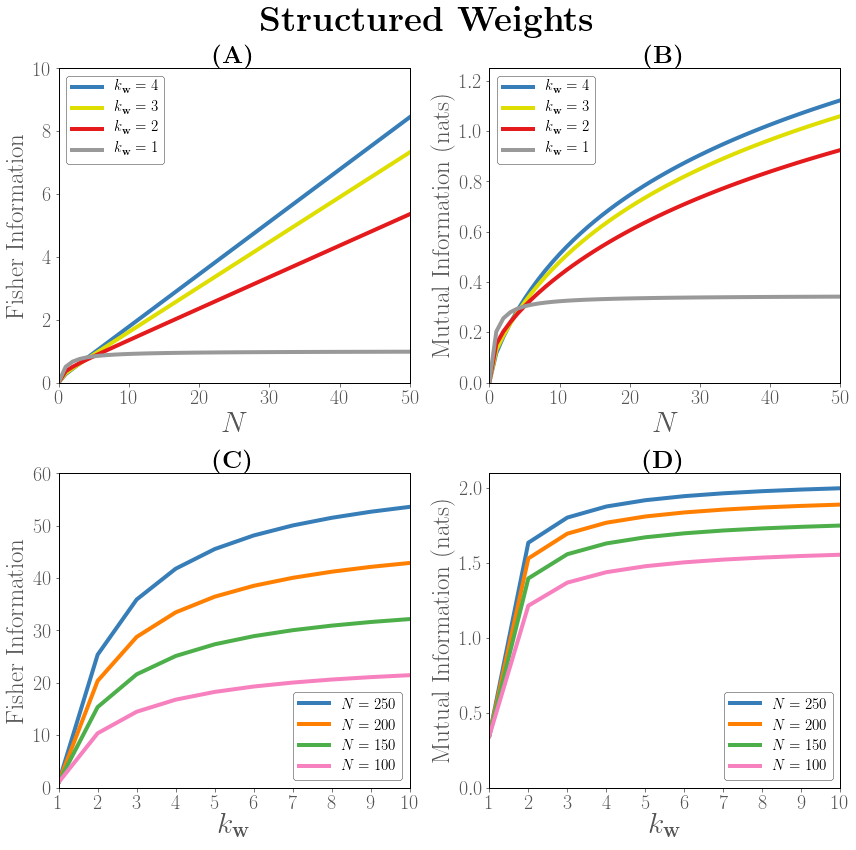

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
struct_weight_plot_linear_N(np.arange(51), [4, 3, 2, 1], 'FI_linear', ax=axes[0, 0])
struct_weight_plot_linear_N(np.arange(51), [4, 3, 2, 1], 'MI_linear', ax=axes[0, 1])
struct_weight_plot_linear_k([250, 200, 150, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'FI_linear', ax=axes[1, 0])
struct_weight_plot_linear_k([250, 200, 150, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'MI_linear', ax=axes[1, 1])

axes[0, 0].set_ylabel('Fisher Information', fontsize=25)
axes[0, 1].set_ylabel('Mutual Information (nats)', fontsize=25)
axes[1, 0].set_ylabel('Fisher Information', fontsize=25)
axes[1, 1].set_ylabel('Mutual Information (nats)', fontsize=25)

axes[0, 0].set_title(r'\textbf{(A)}', fontsize=25)
axes[0, 1].set_title(r'\textbf{(B)}', fontsize=25)
axes[1, 0].set_title(r'\textbf{(C)}', fontsize=25)
axes[1, 1].set_title(r'\textbf{(D)}', fontsize=25)

axes[0, 0].set_ylim([0, 10])
axes[0, 1].set_ylim([0, 1.25])
axes[1, 0].set_ylim([0, 60])
axes[1, 1].set_ylim([0, 2.1])

fig.suptitle(r'\textbf{Structured Weights}', fontsize=35)
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig('figure2-part1.pdf')

# Figure 2, Part 2

/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Text(0.5,0.98,'\\textbf{Unstructured Weights}')

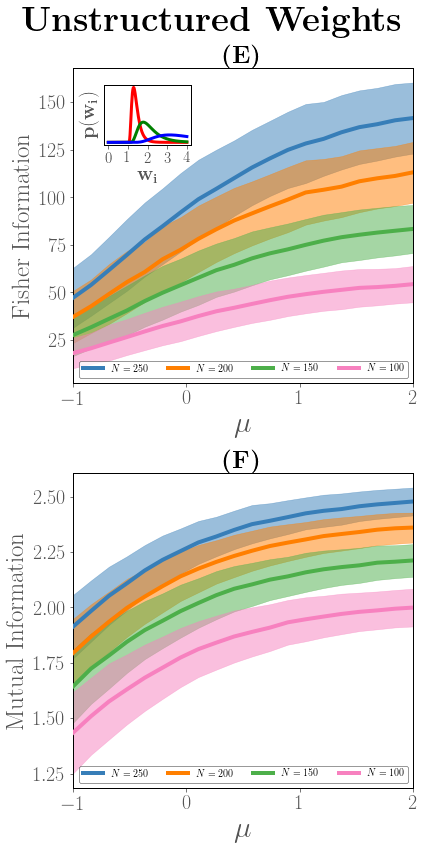

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
unstruct_weight_plot_mu(Ns=[250, 200, 150, 100], mus=np.linspace(-1, 2, 20), sigma=1., repetitions=3000, plot = 'FI_linear', ax=axes[0])
axes[0].set_xlim([-1, 2.0])
inset = fig.add_axes([0.25, 0.82, 0.2, 0.07])
x = np.linspace(0, 4, 200)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(-1)), color='r', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(0)), color='g', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(1)), color='b', linewidth=3)
inset.set_yticklabels([])
inset.set_yticks([])
inset.set_facecolor('white')
inset.set_xticks([0, 1, 2, 3, 4])
inset.tick_params(labelsize=15)
inset.set_ylabel(r'$\mathbf{p(w_i)}$', fontsize=20)
inset.set_xlabel(r'$\mathbf{w_i}$', fontsize=20)
for spine in inset.spines.values():
    spine.set_edgecolor('k')
axes[0].set_ylabel('Fisher Information', fontsize=25)
axes[0].set_title(r'\textbf{(E)}', fontsize=25)

unstruct_weight_plot_mu(Ns=[250, 200, 150, 100], mus=np.linspace(-1, 2, 20), sigma=1., repetitions=3000, plot='MI_linear', ax=axes[1])
axes[1].set_xlim([-1, 2.0])
#ax.set_ylim([0, 160])
axes[1].set_ylabel('Mutual Information', fontsize=25)
axes[1].set_title(r'\textbf{(F)}', fontsize=25)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle(r'\textbf{Unstructured Weights}', fontsize=35)
#plt.savefig('figure2-part2.pdf')